In [1]:
import h5py
import numpy as np
import cv2
import os

from utils.callable_functions import process_hdf5_file , save_point_cloud , depth2pointcloud
from utils.opencv_processing import get_contours_info , get_attributes


## Task 1

In [2]:
hdf5_path = r'C:/Users/user/Downloads/cuboid-sphere.hdf5'


##### 1. Read in the HDF5 file

In [3]:
metadata = process_hdf5_file(hdf5_path)
metadata

{'depth_map': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'intensity_map': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'fx': 60.0,
 'fy': 40.0}

##### 2. Calculate the point cloud
I've found very informative two links i.e., <a href="https://medium.com/yodayoda/from-depth-map-to-point-cloud-7473721d3f">link 1</a> and <a href="https://github.com/HarendraKumarSingh/stereo-images-to-3D-model-generation/blob/master/depth-map-to-3D-point-cloud.ipynb">link 2</a> to convert depth map to point cloud 


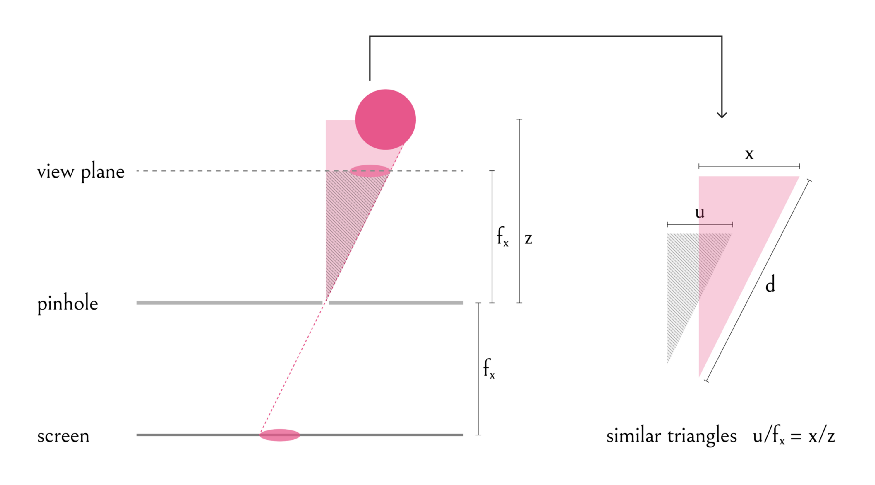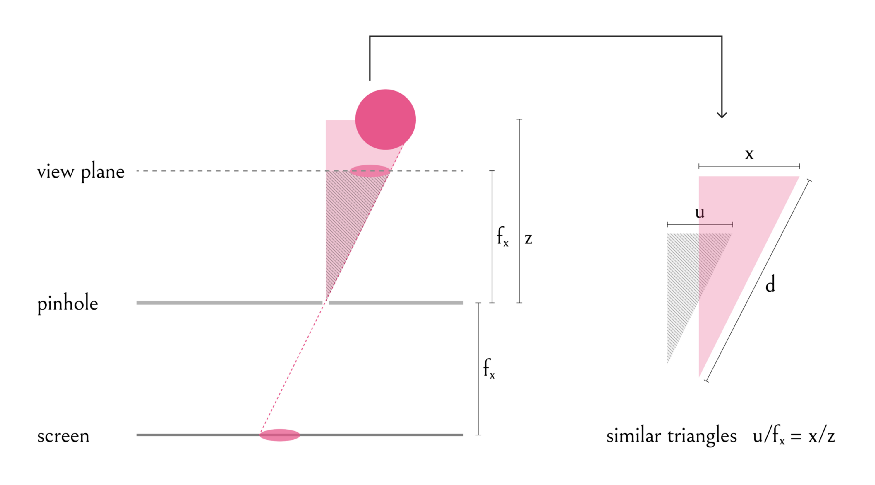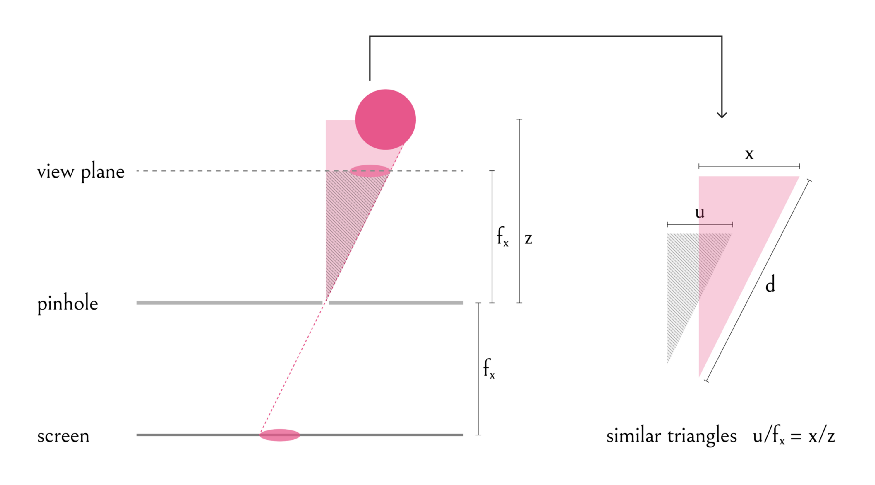

In [4]:
point_clouds = depth2pointcloud(metadata)
point_clouds[:5]

[[11.375, 12.5625, 15],
 [22.475, 24.2875, 29],
 [28.5, 30.15, 36],
 [32.333333333333336, 33.5, 40],
 [33.825, 34.3375, 41]]

##### 1. For each object in the scene, please calculate:
    a.	the surface area,
    b.	the volume,
    c.	the centroid (in global coordinates).

In [5]:
edges, circle, rectangle = get_contours_info(metadata['intensity_map'])
circle,rectangle

([{'shape': 'circle',
   'Cx': 50,
   'Cy': 54,
   'radius': 21.0,
   'center': [50, 54],
   'area': 1385.442360233099}],
 [{'shape': 'rectangle',
   'contour': array([[161,  55],
          [109,  67],
          [108,  95],
          [111,  66],
          [161,  56],
          [155,  85],
          [112,  98],
          [ 98,  88],
          [100,  58],
          [158,  54],
          [ 98,  59],
          [ 98,  89],
          [112,  98],
          [157,  84]], dtype=int32),
   'pixel_area': 65.0,
   'bbox': [98, 54, 63, 44]}])

In [6]:
get_attributes(circle[0], rectangle[0], metadata['intensity_map'].shape)

[{'name': 'circle',
  'surface_area': 3.141592653589793,
  'volume': 0.5235987755982988,
  'centroid': [0.125, 0.19285714285714287]},
 {'name': 'cuboid',
  'surface_area': 0.18165,
  'volume': 0.0051975,
  'centroid': [0.245, 0.19285714285714287]}]

##### 3. Save the point cloud as an HDF5 file

In [7]:
save_point_cloud(point_clouds,save_path='./task1/point_cloud.hdf5')

Point cloud saved to:  ./task1/point_cloud.hdf5
